In [1]:
from WDC.core.dco import Dco
from WDC.core.dbc import Dbc
from WDC.core.coverage import Coverage,AxisSubset
from WDC.helper.util.useful_classes import Date
from WDC.core.switch import Case, RGB
from WDC.helper.operations.numoperations import AggregationMethod

from IPython.display import Image
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import HTML

### Most Basic Query

To perform a basic query, instantiate the `Dbc` and `Dco` objects and provide the coverage through the `coverage` class. Then run the `return_expression` method with the desired value. Here's an example:

In [2]:

dbc = Dbc()
coverage = Coverage("AvgLandTemp")
dco = Dco(coverage, dbc=dbc)

result = dco.return_expression(1).execute().decode("utf-8")
print(result)

1


### Selecting a single value

To select a single value, instantiate the `Dbc` and `Dco` objects and provide the coverage through the `coverage` class. Afterwards, instantiate `AxisSubset` class for each subset you want to include and set them to the coverage class through the `set_subset` method. Finally run the `execute` method. Here's an example:

In [3]:
dbc = Dbc()
coverage = Coverage("AvgLandTemp")
dco = Dco(coverage, dbc=dbc)

lat = AxisSubset('Lat', 53.08)
lon = AxisSubset('Long', 8.80)
ansi = AxisSubset('ansi', Date(2014, 7))
coverage.set_subset(ansi, lat, lon)
result = dco.return_expression(coverage).execute().decode("utf-8")
result

'25.984251'

### 3D>1D subset

To select a single value and show in a specific format,  instantiate the `Dbc` and `Dco` objects and provide the coverage through the `coverage` class. add the subsets same as before and give the coverage to the `return_expression` method. specify the encoding through the `return_format` parameter and run `execute`.

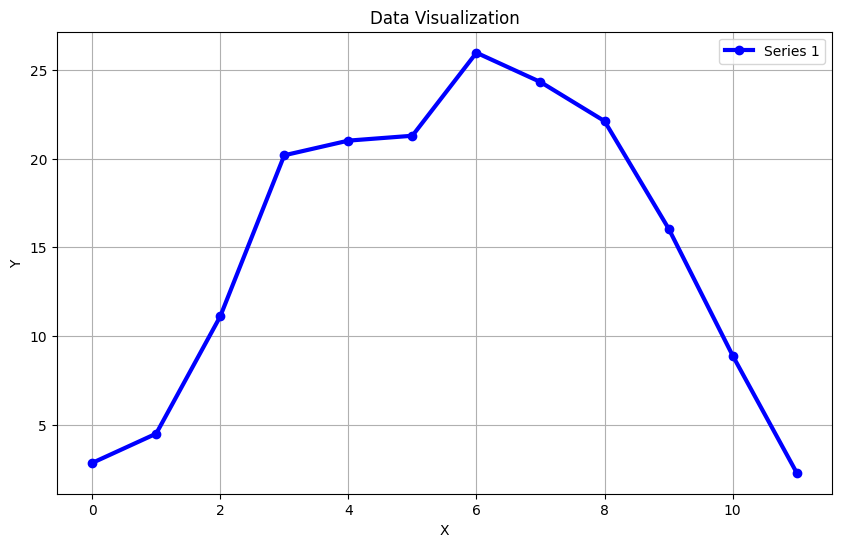

In [4]:
dbc = Dbc()
coverage = Coverage("AvgLandTemp")
dco = Dco(coverage, dbc=dbc)

lat = AxisSubset('Lat', 53.08)
lon = AxisSubset('Long', 8.80)
ansi = AxisSubset('ansi',  (Date(2014, 1), Date(2014, 12)))
coverage.set_subset(ansi, lat, lon)
result = dco.return_expression(coverage).execute(return_format="csv")
if (type(result) is bytes):
  result = list(map(float, result.decode("utf-8").split(',')))
  
  df = pd.DataFrame(result, columns=['Values'])
  csv_content = df.to_csv(index=False)

  # data visualization
  plt.figure(figsize=(10, 6))
  plt.plot(df['Values'], color='b', linestyle='-',
          marker='o', linewidth=3, label='Series 1')
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.title('Data Visualization')
  plt.grid(True)
  plt.legend()
  plt.show()

  display(HTML(csv_content))
else:
  print(result)
  result

### 3D>2D subset

To select a single value and show in a specific format, instantiate the `Dbc` and `Dco` objects and provide the coverage through the `coverage` class. add the subsets same as before and give the coverage to the `return_expression` method. specify the encoding through the `return_format` parameter and run `execute`. the `return_format` parameter is a short form of the actual encoding used, e.g. `png` for `image/png` or `jpeg` for `image/jpeg` respectively.

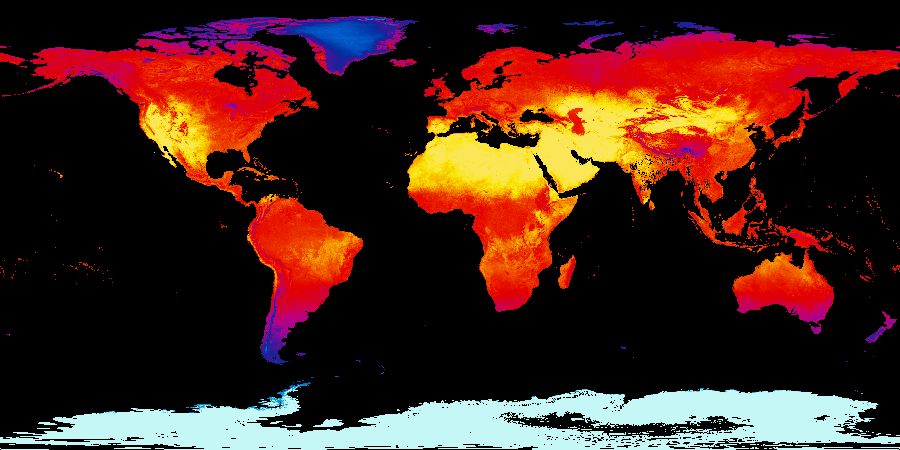

In [5]:
dbc = Dbc()
coverage = Coverage("AvgTemperatureColorScaled")
dco = Dco(coverage, dbc=dbc)

ansi = AxisSubset('ansi', Date(2014, 7))
coverage.set_subset(ansi)
result = dco.return_expression(coverage).execute(return_format="png")


if (type(result) is bytes):
    display(Image(data=result))
else:
    result

### Celsius to Kelvin subset

To select a select a value and perform an operation on it, instantiate the `Dbc` and `Dco` objects and provide the coverage through the `coverage` class. add the subsets same as before perform the operation you wish on the coverage instance. then give the return result of the operation to the `return_expression` method. specify the encoding through the `return_format` parameter and run `execute`. Here's an example:

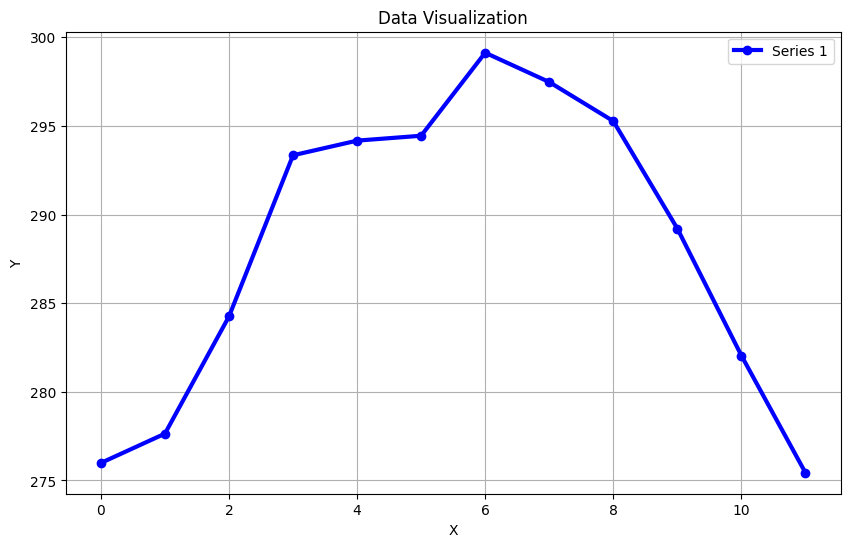

In [6]:
dbc = Dbc()
coverage = Coverage("AvgLandTemp")
dco = Dco(coverage, dbc=dbc)

lat = AxisSubset('Lat', 53.08)
lon = AxisSubset('Long', 8.80)
ansi = AxisSubset('ansi', (Date(2014, 1), Date(2014, 12)))
coverage.set_subset(lat, lon, ansi)
kelvin = coverage + 273.15
result = dco.return_expression(kelvin).execute(return_format="csv")
if (type(result) is bytes):
  result = list(map(float, result.decode("utf-8").split(',')))
  df = pd.DataFrame(result, columns=['Values'])
  csv_content = df.to_csv(index=False)

  # data visualization
  plt.figure(figsize=(10, 6))
  plt.plot(df['Values'],color='b', linestyle='-', marker='o', linewidth=3, label='Series 1')
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.title('Data Visualization')
  plt.grid(True)
  plt.legend()
  plt.show()

  display(HTML(csv_content))
else:
  result

### Min, Max, Avg, Count

To select a value and pass it to an aggregation function, instantiate the `Dbc` and `Dco` objects and provide the coverage through the `coverage` class. add the subsets same as before but inorder to use aggregate function, use the `AggregationMethod` class and specify the function you wish to use alongside the coverage as the argument. Then give the result to the `return_expression` method. specify the encoding through the `return_format` parameter and run `execute`. Here's an example:

In [7]:
dbc = Dbc()
coverage = Coverage("AvgLandTemp")
lat = AxisSubset('Lat', 53.08)
lon = AxisSubset('Long', 8.80)
ansi = AxisSubset('ansi', (Date(2014, 1), Date(2014, 12)))
coverage.set_subset(lat, lon, ansi)

maxValue = dco.return_expression(AggregationMethod.max(coverage)).execute().decode("utf-8")
minValue = dco.return_expression(AggregationMethod.min(coverage)).execute().decode("utf-8")
avgValue = dco.return_expression(AggregationMethod.avg(coverage)).execute().decode("utf-8")
count = dco.return_expression(AggregationMethod.count(coverage > 15)).execute().decode("utf-8")

print(f"Max: {maxValue}\nMin: {minValue}\nAvg: {avgValue}\nCount: {count}\n")

Max: 25.984251
Min: 2.2834647
Avg: 15.052493472894033
Count: 7



### On-the-fly coloring (switch)

To execute a switch statement on multiple selects, instantiate the `Dbc` and `Dco` objects and provide the coverage through the `coverage` class. Then create a coverage, a return value (through the `RGB` class), and finally a case (takes the coverage instance performing an operation and the return value). Create as many cases as you wish, then pass them to the `switch` method in `dco`. Provide the a value for the `default` parameter and finally execute with the desired `return_format`. Here is an example:

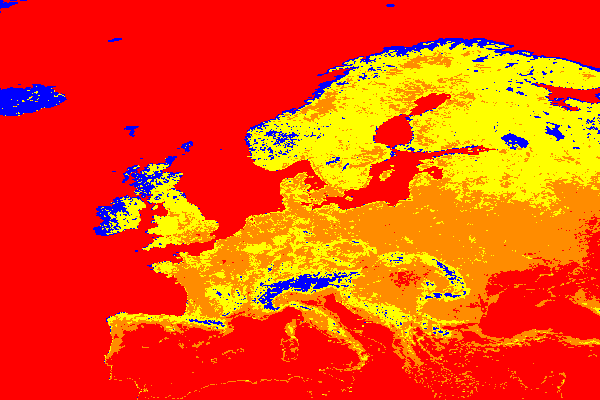

In [8]:
dbc = Dbc()
coverage1 = Coverage("AvgLandTemp")
dco = Dco(coverage1, dbc=dbc)

lat = AxisSubset('Lat', (35, 75))
lon = AxisSubset('Long', (-20, 40))
ansi = AxisSubset('ansi', Date(2014, 7))

coverage1.set_subset(lat, lon, ansi)
return1 = RGB(255, 255, 255)
case1 = Case(coverage1 == 99999, return1)

coverage2 = Coverage("AvgLandTemp")
coverage2.set_subset(lat, lon, ansi)
return2 = RGB(0, 0, 255)
case2 = Case(coverage2 < 18, return2)

coverage3 = Coverage("AvgLandTemp")
coverage3.set_subset(lat, lon, ansi)
return3 = RGB(255, 255, 0)
case3 = Case(coverage1 < 23, return3)

coverage4 = Coverage("AvgLandTemp")
coverage4.set_subset(lat, lon, ansi)
return4 = RGB(255, 140, 0)
case4 = Case(coverage1 < 30, return4)

defaultReturn = RGB(255, 0, 0)
result = dco.switch(case1, case2, case3, case4,
                    default=defaultReturn).execute(return_format="png")
if (type(result) is bytes):
    display(Image(data=result))
else:
  result

### Coverage Constructor

In order to run a coverage constructor, you will need to use the `construct` method. Give the method a list containing 2 tuples with the range you want to check and a second argument that is the operation you want to perform to the constructed coverages. Look at the example below:

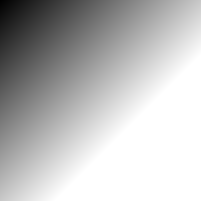

In [9]:
dbc = Dbc()
coverage = Coverage("AvgLandTemp")
dco = Dco(coverage, dbc=dbc)


result = dco.construct(values=[(0, 200), (0, 200)],
                       operator="+").execute(return_format="png")

if (type(result) is bytes):
    display(Image(data=result))
else:
  result

### Polygon Clipping

In order to display polygon clipping, use the `polygon` method and give it a list of tuples containing the range you want to display. The list's size is arbitrary. Follow the example below:

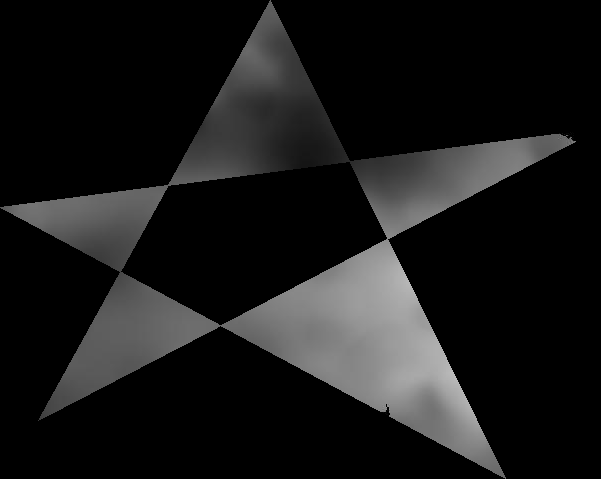

In [10]:
dbc = Dbc()
coverage = Coverage("mean_summer_airtemp")
dco = Dco(coverage, dbc=dbc)
result = dco.clip([(-12.3829, 132.0117), (-33.4314, 120.4102), (-18.8127, 148.5352),
                  (-22.7559, 118.4766), (-36.3151, 143.7891)]).execute(return_format="png")

if (type(result) is bytes):
    display(Image(data=result))
else:
  result

### Invalid Request

In [11]:
dbc = Dbc()
coverage = Coverage("AvgLandTemp")
dco = Dco(coverage, dbc=dbc)

ansi = AxisSubset('ansi', (Date(2014, 1), Date(2014, 12)))
coverage.set_subset(ansi)
result = dco.return_expression(coverage).execute()
print(result)

{'success': False, 'error': {'code': 400, 'message': 'Request Failed', 'exceptionDetail': {'exceptionText': 'Coverage result must use encode() as it is non-scalar value.', 'exceptionCode': 'InvalidRequest'}, 'extra': HTTPError('400 Client Error:  for url: https://ows.rasdaman.org/rasdaman/ows?service=WCS&version=2.0.1&endpoint=https%3A%2F%2Fows.rasdaman.org%2Frasdaman%2Fows')}}
